# <center> INTRODUCTION À PYTHON POUR L'ÉCONOMIE APPLIQUÉE</center>
## <center> COURS 2 : </center>
## <center> OPTIMISATION ET PRÉSENTATION/AFFICHAGE DES RÉSULTATS</center>
#### <center>Michal Urdanivia (UGA)</center>
#### <center> michal.wong-urdanivia@univ-grenoble-alpes.fr </center>

### <center> VUE D'ENSEMBLE </center>


Nous allons commencer a travailler avec des données numériques en utilisant la librarie **numpy**, à résoudre des problèmes simples d'optimisation numériques en utilisant la librarie **scipy** et en particulier les fonctions de **scipy.optimize**, et enfin nous présenterons les résutats sous forme "textuelle" avec la fonction **print**, et de graphiques avec **matplotlib**.

### Références:

- print: [exemples](https://www.python-course.eu/python3_formatted_output.php) (détaillés)
- numpy: [tutoriel détaillé](https://www.python-course.eu/numpy.php)
- matplotlib: [exemples](https://matplotlib.org/stable/tutorials/introductory/sample_plots.html), [documentation](https://matplotlib.org/stable/users/index.html), [styles](https://matplotlib.org/3.1.0/gallery/style_sheets/style_sheets_reference.html)
- scipy-optimize: [documentation](https://docs.scipy.org/doc/scipy/reference/optimize.html)
$\def\R{\mathbb{R}}$

### <center> PROBLÈME DU CONSOMMATEUR</center>
 

Nous allons considérer un consommateur dont les préférences en matière de consommation sont représentées par une fonction d'utilité,
$$
\begin{align*}
u(q_1, q_2): \R_{+}^2 &\rightarrow \R.
\end{align*}
$$

On considère ainsi le cadre de paniers de biens à deux composantes. D'autre part, nous supposons que le consommateur dispose d'un revenu $R$ déterminé de façon exogène par rapport à son choix de consommation. Enfin le vecteur de prix $p = (p_1, p_2)$ est aussi exogène, le consommateur le considérant comme donné.

Le problème de choix du consommateur consiste à déterminer le panier *optimal* $q^* = (q_1^*, q_2^*)$ au sens où il maximise son utilité sous sa contrainte de budjet. Formellement,

$$
\begin{align*}
V(p_1,p_2, R) &= \max_{q_1, q_2} u(q_1, q_2)\\
&t.q.,\\
p_1q_1 + p_2q_2\leq R,& \quad p_1, p_2, R > 0,\\
% &q_1, q_2 \geq 0
\end{align*}
$$


### Exemple: fonction d'utilité Cobb-Douglas.

Dans cet exemple $u(\cdot)$ est donnée par,

$$
\begin{align*}
u(q_1, q_2) &= q_1^\alpha q_2^{1-\alpha}, \quad \alpha \in (0, 1).
\end{align*}
$$

Les solutions optimales sont ici:

$$
\begin{align*}
q^{*}_1 &= \alpha\frac{R}{p_1},\\
q^{*}_2 &= (1-\alpha)\frac{R}{p_2}.
\end{align*}
$$

$q^*_1$, et $q^*_2$ sont des fonctions des prix des biens, et du revenu, qu'on appelle *fonctions de demande*, et que l'on note respectivement 
$q_1^d(p, R)$, et $q_2^d(p, R)$.

### <center> CALCUL NUMÉRIQUE AVEC NUMPY </center>

In [2]:
import numpy as np # importation de la bibliothèque numpy

### L'**array** numpy

Un array numpy est semblable à une liste avec cependant les deux différences suivantes:

1. Les éléments sont homogènes.
2. Une opération de *slicing* sur un array produit une "vue"(à *view*) de celui-ci plutôt que d'extraire du contenu.

### Les bases

Un array numpy peut être créé à partir d'une liste et être multidimensionnel.



In [3]:
A = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]) # une dimension
B = np.array([[3.4, 8.7, 9.9], 
              [1.1, -7.8, -0.7],
              [4.1, 12.3, 4.8]]) # deux dimensions

print(type(A),type(B)) # type
print(A.dtype,B.dtype) # le type des éléments dans les array
print(A.ndim,B.ndim) # dimensions
print(A.shape,B.shape) # "shape" ou format (e.g, 1d: nombre d'éléments, 2d: nombre de lignes x nombre de colonnes)
print(A.size,B.size) # taille(i.e., nombre d'élèments)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
int64 float64
1 2
(10,) (3, 3)
10 9


Le **Slicing** sur un array produit une **vue** de celui-ci:




In [4]:
A = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
B = A.copy() # B est une copie de A
C = A[2:6] # C obtenu par slicing sur A produit une vue de A
C[0] = 0
C[1] = 0
print(A) # A est modifié
print(B) # B ne l'est pas

[0 1 0 0 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


Un array peut aussi être créé en appliquant des fonction numpy qui donnent des arrays spécifiques 

In [5]:
print(np.ones((2,3))) # array rempli de 1
print(np.zeros((4,2))) # array rempli de zéros
print(np.full((3, 5), 3.14)) # array rempli d'un nombre désiré
print(np.arange(0, 10)) # suite de nombres équidistants
print(np.eye(3)) # array sous forme d'une matrice identité
print(np.linspace(0,1,6)) # suite: interpolation linéaire entre deux bornes



[[1. 1. 1.]
 [1. 1. 1.]]
[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
[[3.14 3.14 3.14 3.14 3.14]
 [3.14 3.14 3.14 3.14 3.14]
 [3.14 3.14 3.14 3.14 3.14]]
[0 1 2 3 4 5 6 7 8 9]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[0.  0.2 0.4 0.6 0.8 1. ]


Des précisions sur une fonction comme `np.linspace` peuvent être obtenues avec

In [6]:
help(np.linspace)

Help on function linspace in module numpy:

linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)
    Return evenly spaced numbers over a specified interval.
    
    Returns `num` evenly spaced samples, calculated over the
    interval [`start`, `stop`].
    
    The endpoint of the interval can optionally be excluded.
    
    .. versionchanged:: 1.16.0
        Non-scalar `start` and `stop` are now supported.
    
    .. versionchanged:: 1.20.0
        Values are rounded towards ``-inf`` instead of ``0`` when an
        integer ``dtype`` is specified. The old behavior can
        still be obtained with ``np.linspace(start, stop, num).astype(int)``
    
    Parameters
    ----------
    start : array_like
        The starting value of the sequence.
    stop : array_like
        The end value of the sequence, unless `endpoint` is set to False.
        In that case, the sequence consists of all but the last of ``num + 1``
        evenly spaced samples, so that 

**Remarque**: dans les fonctions précédentes on peut ajouter un argument dtype pour contraindre le type du array(int, ou float).

In [7]:
print(np.ones((2,3), dtype=int)) # array rempli de 1
print(np.zeros((4,2), dtype=int)) # array rempli de zéros

[[1 1 1]
 [1 1 1]]
[[0 0]
 [0 0]
 [0 0]
 [0 0]]


### Opérations mathématiques sur les array

In [8]:
A = np.array([[1,0],[0,1]])
B = np.array([[2,2],[2,2]])

print(A,'\n')
print(B, '\n')
print(A + B,'\n')
print(A - B,'\n')
print(A * B,'\n') # produit élément par élément
print(A / B,'\n') # division élément par élément
print(A @ B,'\n') # produit matriciel

[[1 0]
 [0 1]] 

[[2 2]
 [2 2]] 

[[3 2]
 [2 3]] 

[[-1 -2]
 [-2 -1]] 

[[2 0]
 [0 2]] 

[[0.5 0. ]
 [0.  0.5]] 

[[2 2]
 [2 2]] 



Lorsque les arrays n'ont pas le même format le **broadcasting** est utilisé dans certains cas. Voici un exemple avec la multiplication:

In [9]:
A = np.array([ [10, 20, 30], [40, 50, 60] ]) # format = (2,3) 
B = np.array([1, 2, 3]) # format = (3,) = (1,3)
C = np.array([[1],[2]]) # format = (2,1)


print(A, A.shape, '\n')
print(B, B.shape, '\n') # on remarque la transformation du format en vecteur colonne!
print(C, C.shape, '\n') 

print(A*B,'\n') # chaque ligne est multipliée par B
print(A*C,'\n') # chaque colonne est multipliée par C

[[10 20 30]
 [40 50 60]] (2, 3) 

[1 2 3] (3,) 

[[1]
 [2]] (2, 1) 

[[ 10  40  90]
 [ 40 100 180]] 

[[ 10  20  30]
 [ 80 100 120]] 



Si l'on veut e.g. additionner deux arrays et que le broadcasting est impossible on peut utiliser **np.newaxis**:

In [10]:
A = np.array([1, 2, 3]) # array 1D, shape = (3,)
B = np.array([1,2]) # array 1D, shape = (2,)

#  B ne peut être broadcasté sur  A, car aucun des deux n'a deux dimensions.
# Utilisons à la place newaxis
print(A[:,np.newaxis], A[:,np.newaxis].shape, '\n') # maintenant (3,1)
print(B[np.newaxis,:], B[np.newaxis,:].shape, '\n') # maintenant (1,2)

print(A[:,np.newaxis]*B[np.newaxis,:], '\n') # A est un vecteur colonne, B est un vecteur ligne
print(A[np.newaxis,:]*B[:,np.newaxis]) # A est un vecteur ligne, B est un vecteur colonne

[[1]
 [2]
 [3]] (3, 1) 

[[1 2]] (1, 2) 

[[1 2]
 [2 4]
 [3 6]] 

[[1 2 3]
 [2 4 6]]


**Règle général du broadcasting**: Les arrays peuvent être additionnés/soustraits/multipliés/divisés si dans toutes leurs dimensions ils ont les mêmes tailles, ou l'une d'elles a une taille de 1. Si les arrays diffèrent dans le nombre de leurs dimensions, cela n'est requis que pour les dimensions(intérieures) partagées.



**Plus sur le broadcasting:** 
- [Documentation](https://docs.scipy.org/doc/numpy-1.13.0/user/basics.broadcasting.html),
- [ici aussi](https://jakevdp.github.io/PythonDataScienceHandbook/02.05-computation-on-arrays-broadcasting.html),

De nombreuses **procédures mathématiques** peuvent être exécutées sur les arrays numpy.

In [11]:
A =  np.array([3.1, 2.3, 9.1, -2.5, 12.1])
print(np.min(A)) # obtenir le minimum
print(np.argmin(A)) # obtenir l'indice du minimum 
print(np.mean(A)) # calcul de la moyenne
print(np.sort(A)) # trier (par ordre croissant)

-2.5
3
4.82
[-2.5  2.3  3.1  9.1 12.1]


**Remarque:** parfois une méthode peut être utilisée à la place d'une fonction, e.g. ``A.mean()``. Personnellement, je préfère utiliser les fonctions car elles "fonctionnent" toujours.



### Indexation 

**L'indexation sur plusieurs dimensions** peut être faite ainsi:

In [12]:
X = np.array([ [11, 12, 13], [21, 22, 23] ]) # array 2 x 3
print(X)
print(X[0,0]) # 1ère ligne, 1ère colonne
print(X[0,1]) # 1ère ligne , 2ème colonne
print(X[1,2]) # 2ème ligne, 3ème colonne

[[11 12 13]
 [21 22 23]]
11
12
23


In [13]:
X[0] # 1ère ligne

array([11, 12, 13])

Les indices peuvent être **logiques**. L'opérateur logique pour 'et' est `&` et celui 'ou' est `|`.

In [14]:
A = np.array([1,2,3,4,1,2,3,4])
B = np.array([3,3,3,3,2,3,2,2])
I = (A < 3) & (B == 3) # remarquez qu'on utilise '&' à la place de 'and'
print(I)
print(A[I],'\n')

# Deux façons d'obtenir les indices tels que == True
print(np.where(I)) # Une clause 'where' demande s'il est vrai/True que les éléments vérifient I.
print(I.nonzero()) # Car la variable boolèenne associée vaut 1 pour vrai/True et  0 pour faux/False.

[ True  True False False False  True False False]
[1 2 2] 

(array([0, 1, 5]),)
(array([0, 1, 5]),)


In [15]:
I = (A < 3) | (B == 3) # on remarque l'utilisation de '|' au lieu de 'or'
print(A[I])

[1 2 3 4 1 2]


### Liste de quelques bons points à connaître et maîtriser

**Attributs et méthodes** à connaître:

- size / ndim / shape
- ravel / reshape / sort
- copy

**Fonctions** à connaître:

- array / empty / zeros / ones / linspace
- mean / median / std / var / sum / percentile
- min/max, argmin/argmax / fmin / fmax / sort / clip
- meshgrid / hstack / vstack / concatenate / tile / insert
- allclose / isnan / isinf / isfinite / any / all

**Concepts** à connaître:

- vue vs. copie
- broadcasting
- indexation logique

**Questions** 

1. Soit les lignes de code suivantes,

In [16]:
A = np.array([1,2,3,4,5])
B = A[3:]
B[:] = 0

A quoi est égal `np.sum(A)`?
- **A:** 15
- **B:** 10
- **C:** 6
- **D:** 0
- **E:** Ne sais pas

**Questions** 

2. Considérons le code suivant qui emploi le broadcasting,

In [17]:
A = np.array([0, 1, 2])
print(A + 5, (A + 5).shape, '\n')

[5 6 7] (3,) 



Proposez un code qui donne le même résultat sans broadcasting.

**Réponse**:

In [18]:
B = np.full((1, 3), 5)
print(B)
print(A + B, (A+B).shape)

[[5 5 5]]
[[5 6 7]] (1, 3)


**Questions** 

3. Même question mais pour:

In [19]:
M = np.ones((3, 3))
print(M, M.shape, '\n')
print(M + A, (M + A).shape, '\n')

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]] (3, 3) 

[[1. 2. 3.]
 [1. 2. 3.]
 [1. 2. 3.]] (3, 3) 



**Réponse:**

In [20]:
B  = np.vstack((A, A, A))
print(B)
print(M)
print(M + B)

[[0 1 2]
 [0 1 2]
 [0 1 2]]
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
[[1. 2. 3.]
 [1. 2. 3.]
 [1. 2. 3.]]


Même question mais pour:

In [21]:
M = np.ones((3, 3))
print(M, M.shape, '\n')
print(M + A, (M + A).shape, '\n')

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]] (3, 3) 

[[1. 2. 3.]
 [1. 2. 3.]
 [1. 2. 3.]] (3, 3) 



### Point avancé: sur la mémoire

La mémoire est structurée au niveau des lignes

In [22]:
A = np.array([[3.1,4.2],[5.7,9.3]])
B = A.ravel() # une vue de A unidimensionnelle
print(A.shape,A[0,:])
print(B.shape,B)

(2, 2) [3.1 4.2]
(4,) [3.1 4.2 5.7 9.3]


### <center> FONCTIONS D'UTILITÉ </center>

Définissons la fonction d'utilité:

In [23]:
def utilite(q1,q2,alpha=0.50):
    return q1**alpha*q2**(1-alpha)

# q1,q2 sont des arguments positionnels
# alpha est un argument à mot-clé avec la valeur par défaut de 0.50

### Affichage

Affichage pour un(e) seul(e) appel(évaluation) de la fonction

In [24]:
q1 = 1
q2 = 3
u = utilite(q1,q2)

# f'texte' est un formattage pour la chaîne de caractères 'texte'
# {q1:.3f} affiche la variable q1 comme un flottant 3 chiffres après la virgule

print(f'q1 = {q1:.3f}, q2 = {q2:.3f} -> u = {u:.3f}') 


q1 = 1.000, q2 = 3.000 -> u = 1.732


Plusieurs appels/évaluations,

In [25]:
q1_liste = [2,4,6,8,10,12]
q2 = 3

for q1 in q1_liste: # boucle sur les éléments de q1_liste
    u = utilite(q1,q2,alpha=0.25)
    print(f'q1 = {q1:.3f}, q2 = {q2:.3f} -> u = {u:.3f}')

q1 = 2.000, q2 = 3.000 -> u = 2.711
q1 = 4.000, q2 = 3.000 -> u = 3.224
q1 = 6.000, q2 = 3.000 -> u = 3.568
q1 = 8.000, q2 = 3.000 -> u = 3.834
q1 = 10.000, q2 = 3.000 -> u = 4.054
q1 = 12.000, q2 = 3.000 -> u = 4.243


Un peu mieux...

In [26]:
for i,q1 in enumerate(q1_liste): # i est un compteur
    u = utilite(q1,q2,alpha=0.25)
    print(f'{i:2d}: q1 = {q1:<6.3f} q2 = {q2:<6.3f} -> u = {u:<6.3f}')
    
# {i:2d}: entier de largeur 2 (aligné à droite)
# {q1:<6.3f}: float de largeur 6 et 3 chiffres après la virgule (<, aligné à gauche)

 0: q1 = 2.000  q2 = 3.000  -> u = 2.711 
 1: q1 = 4.000  q2 = 3.000  -> u = 3.224 
 2: q1 = 6.000  q2 = 3.000  -> u = 3.568 
 3: q1 = 8.000  q2 = 3.000  -> u = 3.834 
 4: q1 = 10.000 q2 = 3.000  -> u = 4.054 
 5: q1 = 12.000 q2 = 3.000  -> u = 4.243 


Voir [ici](https://www.geeksforgeeks.org/python-output-formatting/) pour plus d'informations sur le formatage des résultats.  Et pour plus d'options ces [exemples](https://www.python-course.eu/python3_formatted_output.php).

### Affichage dans un fichier texte

Ouverture d'un fichier et écriture dans celui-ci,

In [27]:
with open('unfichier.txt', 'w') as the_file: # 'w' correspond à 'écrire/write'
    
    for i, q1 in enumerate(q1_liste):
        u = utilite(q1,q2,alpha=0.25)
        text = f'{i+10:2d}: q1 = {q1:<6.3f} q2 = {q2:<6.3f} -> u = {u:<6.3f}'
        the_file.write(text + '\n') # \n fait un saut de ligne

# note: la clause 'with' clause assure que le fichier sera fermé par la suite


Ouverture du fichier, lecture des lignes écrites dans celui-ci, et affichage,

In [28]:
with open('unfichier.txt', 'r') as the_file: # 'r' correspond à 'lire'
    
    lines = the_file.readlines()
    for line in lines:
        print(line,end='') # end='' supprime le saut de ligne supplémentaire ajouté par 'print'

10: q1 = 2.000  q2 = 3.000  -> u = 2.711 
11: q1 = 4.000  q2 = 3.000  -> u = 3.224 
12: q1 = 6.000  q2 = 3.000  -> u = 3.568 
13: q1 = 8.000  q2 = 3.000  -> u = 3.834 
14: q1 = 10.000 q2 = 3.000  -> u = 4.054 
15: q1 = 12.000 q2 = 3.000  -> u = 4.243 


**Remarque**: on peut supprimer le fichier par le code suivant,

In [29]:
import os # importation du module 'os'
os.remove("unfichier.txt")

**Remarque**: si vous rédigez un document latex vous pouvez alors importer vos résultats issus de Python et les y inclure.

### Calcul de la fonction d'utilité sur une grille.

On évalue la fonction d'utilité sur une grille bidimensionnelle avec $n$ éléments sur chaque dimension:

In [30]:
# a. Réglages
n = 100 # nombre d'éléments
q_max = 10 # valeur maximale

# b. affectation des arrays 
shape_tuple = (n,n)
q1_vals = np.empty(shape_tuple) # affectation d'arrays 2d avec un format/shape=(n,n)
q2_vals = np.empty(shape_tuple)
u_vals = np.empty(shape_tuple)

# Note: q1_vals et q2_vals sont 2d. 
# Ce n'est pas strictement nécessaire ici, des arrays 1d pouvant suffire dans 
# la boucle emboîtée et le remplissage de u_vals.
# Néanmoins, cela les rend isomorphes avec les grilles utilisées pour 
# les bord des graphiques, qui requièrent souvent des grilles 2d.

# c. remplissage des grilles
for i in range(n): # 0,1,...,n-1
    for j in range(n): # 0,1,...,n-1
        q1_vals[i,j] = (i/(n-1))*q_max # in [0,q_max]
        q2_vals[i,j] = (j/(n-1))*q_max # in [0,q_max]
        u_vals[i,j] = utilite(q1_vals[i,j],q2_vals[i,j],alpha=0.25)

**Alternative**: utiliser des fonctions propres à numpy.

In [31]:
q_vec = np.linspace(0,q_max,n)
q1_vals_alt,q2_vals_alt = np.meshgrid(q_vec,q_vec,indexing='ij')
print('Dimension de la grille sur q1 (et q2): ', q1_vals_alt.shape) 
# La grille est 2d. La fonction utilite a besoin de cela pour calculer élément par élément. 
u_vals_alt = utilite(q1_vals_alt, q2_vals_alt, alpha=0.25)

Dimension de la grille sur q1 (et q2):  (100, 100)


Les **grilles de maillage(mesh grids)** sont un peu difficiles à comprendre mais très importantes pour la créations de graphiques de surface. Pour plus d'information vous pouvez consulter [GeeksforGeeks](https://www.geeksforgeeks.org/numpy-meshgrid-function/), [stack overflow](https://stackoverflow.com/questions/36013063/what-is-the-purpose-of-meshgrid-in-python-numpy) et la [doc numpy](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html)

On teste si l'on a les mêmes résultats,

In [32]:
# a. max de la valeur absolue de la différence entre résultats
max_abs_diff = np.max(np.abs(u_vals-u_vals_alt))
print(max_abs_diff) # proche de zéro

# b. test si toutes les valeurs sont proches
print(np.allclose(u_vals,u_vals_alt))

2.6645352591003757e-15
True


Les résultats ne sont pas exactement les mêmes en raison de l'arithmétique sur les flottants(c.f. cours précédent)

### Graph de la fonction d'utilité

importation de modules et instruction pour avoir les figures en ligne

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt # module de base
from mpl_toolkits.mplot3d import Axes3D # pour les figure 3d
plt.style.use('seaborn-whitegrid') # grille blanche, appropriée en 3d

Construction du graphique

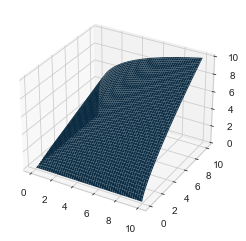

In [34]:
fig = plt.figure() # création de la figure
ax = fig.add_subplot(1,1,1,projection='3d') # création d'un système d'axes 3d sur la figure
ax.plot_surface(q1_vals,q2_vals,u_vals); # création d'un graph de surface sur le système d'axes

# remarque: fig.add_subplot(a,b,c) crée le c'th sous-graph sur une grille de a x b graphs

Faire que la figure soit **zoomable** et **interactive** avec widget

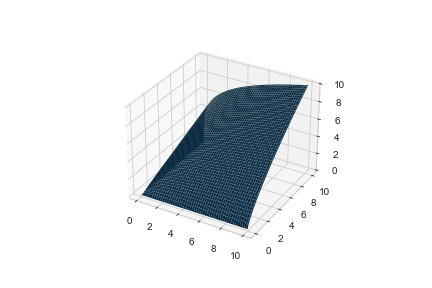

In [35]:
%matplotlib widget
fig = plt.figure() # create the figure
ax = fig.add_subplot(1,1,1,projection='3d') # création d'un système d'axes 3d sur la figure
ax.plot_surface(q1_vals,q2_vals,u_vals); # création d'un graph de surface sur le système d'axes

On revient sur l'affichage en ligne

In [36]:
%matplotlib inline

**Extensions**: couleurs, rendre la figure plus agréable visuellement, sauvegarde.

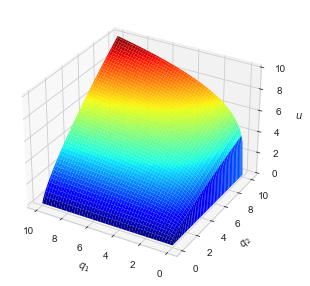

In [37]:
from matplotlib import cm # pour 'colormap', couleurs pour la figure

# a. le graphique en cours
fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection='3d')
ax.plot_surface(q1_vals,q2_vals,u_vals,cmap=cm.jet)

# b. ajouts de labels
ax.set_xlabel('$q_1$')
ax.set_ylabel('$q_2$')
ax.set_zlabel('$u$')

# c. inversion de l'axe des 'x' pour amener l'origine au devant au centre 
ax.invert_xaxis()

# d. sauvegarde
fig.tight_layout()
fig.savefig('unefigure.pdf') # ici .pdf mais peut être un autre format, e.g., .png 

**Plus d'options pour le format?** voir ces [exemples](https://matplotlib.org/tutorials/introductory/sample_plots.html#sphx-glr-tutorials-introductory-sample-plots-py).

**Une autre variation**: 

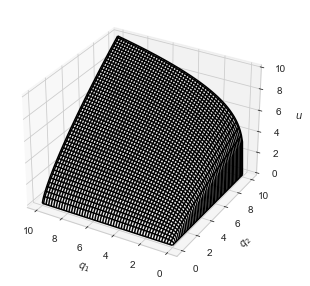

In [38]:
# a. graphique en cours
fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection='3d')
ax.plot_wireframe(q1_vals, q2_vals,u_vals,edgecolor='black')

# b. ajout de labels
ax.set_xlabel('$q_1$')
ax.set_ylabel('$q_2$')
ax.set_zlabel('$u$')

# c. iversion de l'axe des x
ax.invert_xaxis()

# e. sauvegarde
fig.tight_layout()
fig.savefig('unefigure_cadre2.png')
fig.savefig('unefigure_cadre2.pdf')

### Résumé

Nous avons traité:

1. L'affichage de résultats (visuellement, leurs enregistrement en fichier)
2. Les graphiques/figures (matplotlib)

**Autres modules pour graphiques:** [seaborn](https://seaborn.pydata.org/) et [bokeh](https://bokeh.pydata.org/en/latest/).

### <center> ALGORITHME 1: BOUCLES SIMPLES </center>

Rappelons que notre problème est,

$$
\begin{align*}
V(p_{1},p_{2},R) & = \max_{q_{1},q_{2}}u(q_{1},q_{2})\\
 & \text{t.q.}\\
p_{1}q_{1}+p_{2}q_{2} & \leq R,\,\,\,p_{1},p_{2},R>0\\
q_{1},q_{2} & \geq 0
\end{align*}
$$

**Idée:** faire une boucle sur une grille $n_1 \times n_2$ solutions potentielles. Ceci revient à résoudre:

$$
\begin{align*}
V(p_{1},p_{2},R) & = \max_{q_{1}\in Q_1,q_{2} \in Q_2} q_1^{\alpha}q_2^{1-\alpha}\\
 & \text{t.q.}\\
 Q_1 & = \left\{0,\frac{1}{n_1-1}\frac{R}{p_1},\frac{2}{n_1-1}\frac{R}{p_1},\dots,\frac{R}{p_1}\right\} \\
 Q_2 & = \left\{0,\frac{1}{n_2-1}\frac{R}{p_2},\frac{2}{n_2-1}\frac{ R}{p_2},\dots,\frac{ R}{p_2}\right\} \\
p_{1}q_{1}+p_{2}q_{2} & \leq R\\
\end{align*}
$$

Une fonction faisant cela est ici,

In [39]:
def meilleur_choix(alpha,R,p1,p2,n1,n2, affichage_print=True):
    
    # a. affectation d'arrays
    shape_tuple = (n1,n2)
    q1_vals = np.empty(shape_tuple)
    q2_vals = np.empty(shape_tuple)
    u_vals = np.empty(shape_tuple)
    
    # b. début avec q1=q2=0
    q1_meilleur = 0
    q2_meilleur = 0
    u_meilleur = utilite(0,0,alpha=alpha)
    
    # c. boucle sur toutes les possibilités
    for i in range(n1):
        for j in range(n2):
            
            # i. q1 et q2 (affectation en chaîne)
            q1_vals[i,j] = q1 = (i/(n1-1))*R/p1
            q2_vals[i,j] = q2 = (j/(n2-1))*R/p2
            
            # ii. utilité
            if p1*q1 + p2*q2 <= R: # u(q1,q2) si dépenses <= revenu 
                u_vals[i,j] = utilite(q1,q2,alpha=alpha)
            else: # u(0,0) si dépenses > revenu
                u_vals[i,j] = utilite(0,0,alpha=alpha)
            
            # iii. test si meilleur choix jusque là
            if u_vals[i,j] > u_meilleur:
                q1_meilleur = q1_vals[i,j]
                q2_meilleur = q2_vals[i,j] 
                u_meilleur = u_vals[i,j]
    
    # d. affichage si affichage_print = True
    if affichage_print:
        print_solution(q1_meilleur,q2_meilleur,u_meilleur,R,p1,p2)

    return q1_meilleur,q2_meilleur, u_meilleur,q1_vals,q2_vals,u_vals

# fonction pour l'affichage de la solution
def print_solution(q1,q2,u,R,p1,p2):
    print(f'q1 = {q1:.8f}')
    print(f'q2 = {q2:.8f}')
    print(f'u  = {u:.8f}')
    print(f'R-p1*q1-p2*q2 = {R-p1*q1-p2*q2:.8f}') 

Appel de la fonction:

In [40]:
sol = meilleur_choix(alpha=0.25,R=10,p1=1,p2=2,n1=500,n2=400)

q1 = 2.50501002
q2 = 3.74686717
u  = 3.38807948
R-p1*q1-p2*q2 = 0.00125564


Graph de la solution:

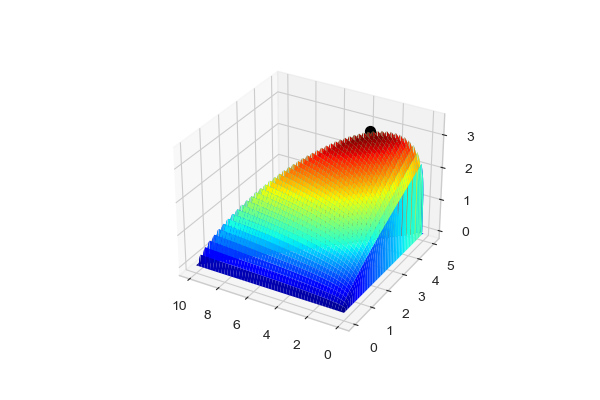

In [41]:
%matplotlib widget

# a. on déballe les éléments de la solution
q1_meilleur,q2_meilleur,u_meilleur,q1_vals,q2_vals,u_vals = sol

# b. mise en place du graphique
fig = plt.figure(dpi=100,num='')
ax = fig.add_subplot(1,1,1,projection='3d')

# c. graph 3d de l'utilité pour différents choix
ax.plot_surface(q1_vals,q2_vals,u_vals,cmap=cm.jet)
ax.invert_xaxis()

# d. graph du choix optimal
ax.scatter(q1_meilleur,q2_meilleur,u_meilleur,s=50,color='black');

In [42]:
%matplotlib inline

**Exercice**: Trouvez une meilleure solution apportant plus d'utilité et avec un revenu non dépensé , $R-p_1 q_1-p_2 q_2$, moindre.

**Réponse**

In [43]:
sol = meilleur_choix(alpha=0.25,R=10,p1=1,p2=2,n1=1000,n2=1000)

q1 = 2.50250250
q2 = 3.74874875
u  = 3.38850695
R-p1*q1-p2*q2 = 0.00000000


### <center> ALGORITHME 2: UTILISATION DE LA MONOTONICITÉ </center>

**Idée:** boucle sur une grille de $n$ solutions possibles pour $q_1$ et en supposant que la partie non dépensée en $q_1$ l'est en $q_2$. Ceci est équivalent à résoudre:


$$
\begin{align*}
V(p_{1},p_{2},R) & = \max_{q_{1}\in Q_1} q_1^{\alpha}q_2^{1-\alpha}\\
 \text{t.q.}\\
 Q_1 & = \left\{0,\frac{1}{n-1}\frac{}{p_1},\frac{2}{n-1}\frac{R}{p_1},\dots,\frac{R}{p_1}\right\} \\
q_{2} & = \frac{R-p_{1}q_{1}}{p_2}\\
\end{align*}
$$

Une fonction pour faire cela:

In [44]:
def meilleur_choix_monotone(alpha,R,p1,p2,n,affichage_print=True):
    
    # a. affectation d'arrays
    shape_tuple = (n)
    q1_vals = np.empty(shape_tuple)
    q2_vals = np.empty(shape_tuple)
    u_vals = np.empty(shape_tuple)
    
    # b. début partant de q1=q2=0
    q1_meilleur = 0
    q2_meilleur = 0
    u_meilleur = utilite(0,0,alpha)
    
    # c. boucle sur toutes les possibilités
    for i in range(n):
        
        # i. q1
        q1_vals[i] = q1 = i/(n-1)*R/p1
        
        # ii. q2 résultant
        q2_vals[i] = q2 = (R-p1*q1)/p2
            
        # iii. utilité
        u_vals[i] = utilite(q1,q2,alpha)
        
        if u_vals[i] >= u_meilleur:    
            q1_meilleur = q1_vals[i]
            q2_meilleur = q2_vals[i] 
            u_meilleur = u_vals[i]
            
    # d. affichage
    if affichage_print:
        print_solution(q1_meilleur,q2_meilleur,u_meilleur,R,p1,p2)   

    return q1_meilleur,q2_meilleur,u_meilleur,q1_vals,q2_vals,u_vals

In [45]:
sol_monotone = meilleur_choix_monotone(alpha=0.25,R=10,p1=1,p2=2,n=1000) 

q1 = 2.50250250
q2 = 3.74874875
u  = 3.38850695
R-p1*q1-p2*q2 = 0.00000000


Graph de la solution:

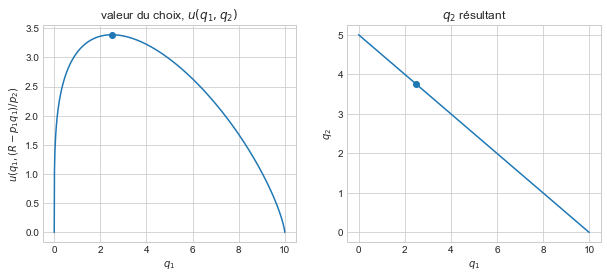

In [46]:
plt.style.use("seaborn-whitegrid")

# a. création du graph
fig = plt.figure(figsize=(10,4))# la tailles est en pouces...

# b. on déballe les éléments de la solution
q1_meilleur,q2_meilleur, u_meilleur, q1_vals,q2_vals,u_vals = sol_monotone

# c. graph à gauche
ax_left = fig.add_subplot(1,2,1)

ax_left.plot(q1_vals,u_vals)
ax_left.scatter(q1_meilleur,u_meilleur) # ajout de la solution comme un point

ax_left.set_title('valeur du choix, $u(q_1,q_2)$')
ax_left.set_xlabel('$q_1$')
ax_left.set_ylabel('$u(q_1,(R-p_1 q_1)/p_2)$')
ax_left.grid(True)

# c. graph à droite 
ax_right = fig.add_subplot(1,2,2)

ax_right.plot(q1_vals,q2_vals)
ax_right.scatter(q1_meilleur,q2_meilleur)

ax_right.set_title('$q_2$ résultant')
ax_right.set_xlabel('$q_1$')
ax_right.set_ylabel('$q_2$')
ax_right.grid(True)

### <center> ALGORITHME 3: RECOURS À UN SOLVEUR</center>


In [47]:
from scipy import optimize

Choix de paramètres:

In [48]:
alpha = 0.25 # paramètre sur les préférences
R = 10 # revenu
p1 = 1 # prix du bien 1
p2 = 2 # prix du bien 2

**Cas 1**: solveur scalaire avec monotonicité.

In [49]:
# a. fonction objectif(à minimiser)
def valeur_du_choix(q1,alpha,R,p1,p2):
    q2 = (R-p1*q1)/p2
    return -utilite(q1,q2,alpha)

# b. appel du soleur
sol_cas1 = optimize.minimize_scalar(
    valeur_du_choix,method='bounded',
    bounds=(0,R/p1),args=(alpha,R,p1,p2))

# c. on déballe la solution
q1 = sol_cas1.x
q2 = (R-p1*q1)/p2
u = utilite(q1,q2,alpha)
print_solution(q1,q2,u,R,p1,p2)

q1 = 2.50000006
q2 = 3.74999997
u  = 3.38850751
R-p1*q1-p2*q2 = 0.00000000


**Cas 2**: solveur multidimensionnel sous contraintes.

In [50]:
# a. fonction objectif(à minimiser)
def valeur_du_choix(q,alpha,R,p1,p2):
    # remarque: q est un vecteur
    q1 = q[0]
    q2 = q[1]
    return -utilite(q1,q2,alpha)

# b. contraites (non satisfaites si négatives) et bornes
constraintes = ({'type': 'ineq', 'fun': lambda q:  R-p1*q[0]-p2*q[1]})
bornes = ((0,R/p1),(0,R/p2))

# c. appel du solveur
valeurs_initiales = [R/p1/2,R/p2/2]
sol_cas2 = optimize.minimize(
    valeur_du_choix,valeurs_initiales,args=(alpha,R,p1,p2),
    method='SLSQP',bounds=bornes,constraints=constraintes)

# d. unpack solution
q1 = sol_cas2.x[0]
q2 = sol_cas2.x[1]
u = utilite(q1,q2,alpha)
print_solution(q1,q2,u,R,p1,p2)

q1 = 2.49937952
q2 = 3.75031024
u  = 3.38850748
R-p1*q1-p2*q2 = 0.00000000


**Cas 3**: solveur multidimensionnel sans contraintes implémenté via des pénalités.

In [51]:
# a. fonction objectif(à minimiser)
def valeur_du_choix(q,alpha,R,p1,p2):
    
    # i. unpack
    q1 = q[0]
    q2 = q[1]
    
    # ii. pénalité
    penalite = 0
    E = p1*q1+p2*q2 # total des dépenses
    if E > R: # dépenses > revenu -> non permis
        fac = R/E
        penalite += 1000*(E-R) # calcul de la pénalité   
        q1 *= fac # on force E=R
        q2 *= fac # on force E=R
        
    return -utilite(q1,q2,alpha) 

# b. appel du solveur
valeurs_initiales = [R/p1/2,R/p2/2]
sol_cas3 = optimize.minimize(
    valeur_du_choix,valeurs_initiales,method='Nelder-Mead',
    args=(alpha,R,p1,p2))

# c. unpack solution
q1 = sol_cas3.x[0]
q2 = sol_cas3.x[1]
u = utilite(q1,q2,alpha)
print_solution(q1,q2,u,R,p1,p2)

q1 = 2.58573053
q2 = 3.87859581
u  = 3.50470694
R-p1*q1-p2*q2 = -0.34292214


**Task:** trouvez l'<font color='red'>**erreur**</font> dans le code de la cellule précédente.

In [52]:
# Code pour la réponse ici:

**Réponse:**

In [53]:
# a. fonction objectif(à minimiser)
def valeur_du_choix(q,alpha,R,p1,p2):
    
    # i. unpack
    q1 = q[0]
    q2 = q[1]
    
    # ii. pénalité
    penalite = 0
    E = p1*q1+p2*q2 # total des dépenses
    if E > R: # dépenses > revenu -> non permis
        fac = R/E
        penalite += 1000*(E-R) # calcul de la pénalité   
        q1 *= fac # on force E=R
        q2 *= fac # on force E=R
        
    return -utilite(q1,q2,alpha) + penalite

# b. appel du solveur
valeurs_initiales = [R/p1/2,R/p2/2]
sol_cas3 = optimize.minimize(
    valeur_du_choix,valeurs_initiales,method='Nelder-Mead',
    args=(alpha,R,p1,p2))

# c. unpack solution
q1 = sol_cas3.x[0]
q2 = sol_cas3.x[1]
u = utilite(q1,q2,alpha)
print_solution(q1,q2,u,R,p1,p2)

q1 = 2.49995337
q2 = 3.75002332
u  = 3.38850751
R-p1*q1-p2*q2 = 0.00000000


### <center> COURBES D'INDIFFÉRENCE </center>

Rappelons que la courbe d'indifférence traversant le point $(\tilde{q}_1,\tilde{q}_2)$ est donné par

$$
\big\{(q_1,q_2) \in \mathbb{R}^2_+ \,|\, u(q_1,q_2) = u(\tilde{q}_1,\tilde{q}_2)\big\}
$$

Pour trouver laqcouqbe d'indifférence on peut fixer une grille pour $q_2$, et obtenir le $q_1$ correspondant lequel est solution de $u(q_1,q_2) = u(\tilde{q}_1,\tilde{q}_2)$ pour chaque valeur de $q_2$.

In [54]:
def objectif(q1,q2,alpha,u):
    return utilite(q1,q2,alpha)-u 
    # = 0 et alors sur la courbe d'indifférence d'utilité = u

def courbe_indifference(q1_tilde,q2_tilde,alpha,n,q2_max):
    
    # a. utilité en (q1_tilde, q2_tilde)
    u_tilde = utilite(q1_tilde,q2_tilde,alpha)
    
    # b. allocate numpy arrays
    q1_vec = np.empty(n)
    q2_vec = np.linspace(1e-8,q2_max,n)
    
    # c. boucle sur q2
    for i,q2 in enumerate(q2_vec):

        q1_initial = 0 # valeur initiale
        sol = optimize.root(objectif, q1_initial, args=(q2,alpha,u_tilde)) 
        # optimize.root -> cherche une solution pour objectif = 0 commençant en q1 = q1_initial
        
        q1_vec[i] = sol.x[0]
    
    return q1_vec,q2_vec

Courbe d'indifférence obtenue et son graph:

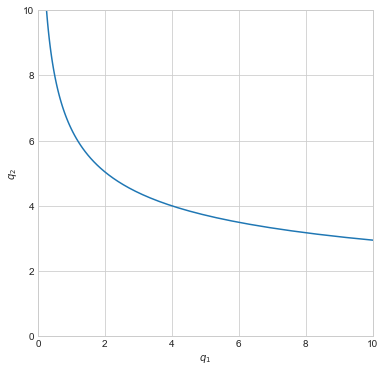

In [55]:
# a. courbe d'indifférence traversant (4,4) for q2 dans [0,10]
q2_max = 10
q1_vec,q2_vec = courbe_indifference(q1_tilde=4,q2_tilde=4,alpha=0.25,n=100,q2_max=q2_max) 

# b. graph pour la courbe d'indifférence
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)

ax.plot(q1_vec,q2_vec)

ax.set_xlabel('$q_1$')
ax.set_ylabel('$q_2$')
ax.set_xlim([0,q2_max])
ax.set_ylim([0,q2_max])
ax.grid(True)

**Exercice:** trouver la courbe d'indifférence qui traverse $q_1 = 15$ et $q_2 = 3$ avec $\alpha = 0.5$.

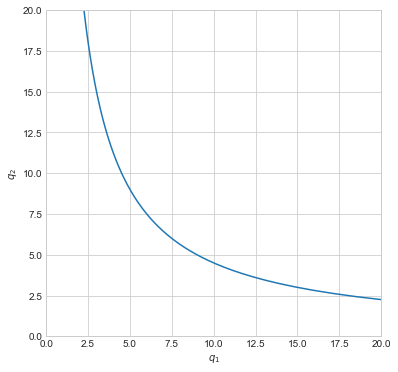

In [56]:
q2_max = 20
q1_vec,q2_vec = courbe_indifference(q1_tilde=15,q2_tilde=3,alpha=0.5,n=100,q2_max=q2_max) 

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)
ax.plot(q1_vec,q2_vec)

ax.set_xlabel('$q_1$')
ax.set_ylabel('$q_2$')
ax.set_xlim([0,q2_max])
ax.set_ylim([0,q2_max])
ax.grid(True)

### <center> SOLUTION PLUS ÉLÉGANTE(CLASSE) </center>

> **Remarque:** Cette partie est plus avancée car on utilise un module avec une classe. Elle constitue néanmoins un bon exemple sur la manière de structurer un code pour résoudre et illustrer un modèle.

**Chargement du module** le module est 'consommateur_module.py' est dans le même dossier que ce notebook.

In [57]:
from consommateur_module import consommateur

### MU

Nous allons donner naissance à un consommateur appelé MU

In [58]:
MU = consommateur() # création d'une instance de la classe consommateur appelée MU
print(MU)

alpha = 0.500
vecteur de prix = (p1,p2) = (1.000,2.000)
revenu = R = 10.000



Solution du problème de **MU**.

In [59]:
MU.solve()
print(MU)

alpha = 0.500
vecteur de prix = (p1,p2) = (1.000,2.000)
revenu = R = 10.000
solution:
 q1 = 5.00
 q2 = 2.50

